# Liniowy model

## Tworzymy nasz model liniowy odróżniający gatunek irysów Setosa od innych!

In [1]:
# Standardowe importowanie pakietów
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.datasets import load_iris

In [2]:
# Załadujmy jeszcze raz dane iris
iris = load_iris()
X,Y = iris.data[:,0:2], iris.target
Y = Y==0 # Troche magii żeby przewidywał tylko Iris Setosa albo "nie Iris Setosa"

In [3]:
iris.target_names # Setosa jest pierwsza (indeks 0)

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [4]:
# Ok! Dopasowywujemy model. 
from sklearn.svm import LinearSVC
# Regresja liniowa. Jeden z wielu modeli, których końcowym wynikiem jest linia prosta :)
pierwszy_model = LinearSVC() 
pierwszy_model.fit(X, Y) # Wspominany interfejs! Po zrobieniu fit mamy linię prostą

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [7]:
print pierwszy_model.coef_
print pierwszy_model.intercept_

[[-1.54140239  2.28321214]]
[ 1.21005929]


### b) Model machine learningowy (*pierwszy_model* w naszym kodzie) można streścić jako:

"Jeśli -1.541405 \* **długość_płatka** + 2.28320578 \* **szerokość_płatka** >= 0 to jest to kwiatek gatunku *Iris Setosa*"

Nie uwierzycie ile modeli jest tak prostych :)

In [10]:
# Można zapytać (predict w Estimator)
pierwszy_model.predict([[-0.109, 0.451], [1,1] ]) # Kwiatek gatunku Iris Setosa! 

array([ True,  True], dtype=bool)

### Ćwiczenie 6 (2 pkt)

Zaprogramuj funkcje predict() ktora bedzie zwracac to co pierwszy_model.predict. Funkcja powinna przejsc testy i implementowac nastepujacy interfejs

In [40]:
def predict(z):
    return -1.54140239*z[0] + 2.28321214*z[1] +1.21005929 >= 0

In [100]:
for x in np.linspace(4.5, 8, 10):
    for y in np.linspace(4, 10, 10):
        assert pierwszy_model.predict([[x, y]]) == predict([x, y]), "Failed on {},{}".format(x, y)

### Wizualizacja nauczonego modelu

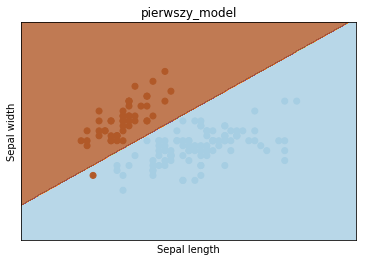

In [18]:
# Tworzymy siatkę punktów w odstępie 1e-2
h = 1e-2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Przewidujemy
Z = pierwszy_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Rysujemy ładny wykres 
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("pierwszy_model")

## Podstawy machine learningu

Podsumujmy co wiemy:
    
* Machine Learning zajmuje się tworzeniem modeli, które uczymy na podstawie danych
* Scikit-learn udostępnia wiele modeli, uczymy je za pomocą funkcji **fit**, przewidujemy za pomocą funkcji **predict**
* Ważną klasą modeli są modele liniowe na których się skupimy
* Znamy podstawy numpy i matplotlib

Wprowadzimy jeszcze 2 pojęcia:
* Testowanie modelu
* Hiperparametry



### a) Testowanie modelu

Chcemy wiedzieć jak dobry jest model który mamy. W tym celu sobie symulujemy, i dzielimy zbiór danych na ** zbiór trenujący ** i ** zbiór testujący **. Uczymy się na zbiorze trenującym, testujemy na testującym. Zwykle podsumowywujemy wynik modelu jedną liczbą, np. **dokładność** (ang. *accuracy*) czyli ilość procent poprawnie sklasyfikowanych przykładów

Przetestujmy jak sobie radzi nasz LogisticRegression na zbiorze Iris. Teraz weźmiemy wszystkie przykłady do nauki

In [20]:
# Załadujmy jeszcze raz dane iris
iris = load_iris()
X,Y = iris.data, iris.target

In [21]:
# Dzielimy (scikit-learn)
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1)

C:\Users\244976\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
print "Pierwszy przykład trenujący: ", X_train[0], "Klasa: ", Y_train[0]

Pierwszy przykład trenujący:  [ 6.5  2.8  4.6  1.5] Klasa:  1


In [23]:
drugi_model = LinearSVC(C=1) 
drugi_model.fit(X_train, Y_train) # Wspominany interfejs! Po zrobieniu fit mamy linię prostą
Y_test_predicted = drugi_model.predict(X_test)

In [24]:
print "Przewidywania na pierwszych 10 przykladach: ", Y_test_predicted[0:10]

Przewidywania na pierwszych 10 przykladach:  [0 1 1 0 2 2 2 0 0 2]


In [25]:
import sklearn
print "Dokładność modelu to: ",100*sklearn.metrics.accuracy_score(Y_test, Y_test_predicted), "%"

Dokładność modelu to:  89.4736842105 %


### c) Hiperparametry

Każdy model opisywany jest hiperparametrami. Przykładowo w regresji liniowej możemy podać "fit_intercept" co oznacza czy linia ma przechodzi przez środek współrzędnych czy nie. Innym parametrem jest C - intuicyjnie opisuje prostote modelu

# Cwiczenie 7 (2 pkt) 

1. Znalezc C ktore na X_test, Y_test ma 100%. 
2. Narysowac wykres, na osi X wartosc C, na osi Y dokladnosc dla danego C

In [117]:
# Sprawdzanie C=0.1
drugi_model = LinearSVC(C=34,random_state=5) 
drugi_model.fit(X_train, Y_train) # Wspominany interfejs! Po zrobieniu fit mamy linię prostą
Y_test_predicted = drugi_model.predict(X_test)
print "Dokładność modelu to: ",100*sklearn.metrics.accuracy_score(Y_test, Y_test_predicted), "%"

Dokładność modelu to:  100.0 %


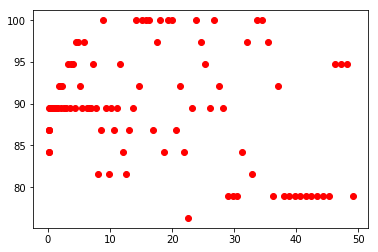

In [118]:
cc = [ 0.1+(x*x)/200.0 for x in range(100)]
def numnum(c):
    drugi_model = LinearSVC(C=c, random_state=5) 
    drugi_model.fit(X_train, Y_train) # Wspominany interfejs! Po zrobieniu fit mamy linię prostą
    Y_test_predicted = drugi_model.predict(X_test)
    return 100*sklearn.metrics.accuracy_score(Y_test, Y_test_predicted)
dd =  [numnum(x) for x in cc]

import matplotlib.pylab as p
p.plot(cc,dd,'ro')
p.show()
#zrobić rysowanie